In [1]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import numpy.linalg as la
from sklearn import linear_model
%matplotlib inline


In [2]:
def import_data(filename):
    train_labels, train_data = [], []
    for line in open(filename):
        im = misc.imread(line.strip().split()[0])
        train_data.append(im.reshape(2500,))
        train_labels.append(line.strip().split()[1])
    train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
    return train_data, train_labels

In [3]:
def get_low_rank_approximation(U, S, Vh, r):
    diag_matrix = np.diag(S)
    X_r = np.zeros(shape = (len(U), len(Vh[0])))
    X_r = np.dot(np.dot(U[:,: r], diag_matrix[: r,: r]), Vh [: r,:])
    
    return X_r
    

In [4]:
def get_r_dimensional_feature_face(Vh, X, r):
    # get the first r rows of Vh
    Vh_r = Vh[:r,:]
    # transpose it
    transpose_Vh_r = np.transpose(Vh_r)
    # multiple X
    F = np.dot(X, transpose_Vh_r)
    
    return F


In [39]:
def get_classification_accuracy(F, train_labels, F_test, test_labels):
    model = linear_model.LogisticRegression()
    model.fit(F, train_labels)
    predicted_labels = model.predict(F_test)
    count = 0.0
    for index in range(len(F_test)):
        if predicted_labels[index] == test_labels[index]:
            count +=1
    
    return count/float(len(F_test))


In [69]:
def get_accuracy_list(Vh, train_data, train_labels, test_data, test_labels, total_range):
    i = 1
    
    accuracy_list = []
    range_list = []
    
    while i <= total_range:
#         print (i)
        range_list.append(i)
        F = get_r_dimensional_feature_face(Vh, train_data, i)
        F_test = get_r_dimensional_feature_face(Vh, test_data, i)
        accuracy = get_classification_accuracy(F, train_labels, F_test, test_labels)
        accuracy_list.append(accuracy)
        i +=1
    
    return range_list, accuracy_list
        
        
        

(540, 2500) (540,)


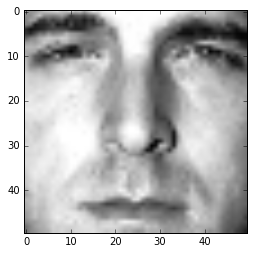

In [6]:
# get train data and labels
# X is the image index(0-540)
X = 530
train_data, train_labels = import_data('./faces/train.txt')
print (train_data.shape, train_labels.shape)
plt.imshow(train_data[X, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)


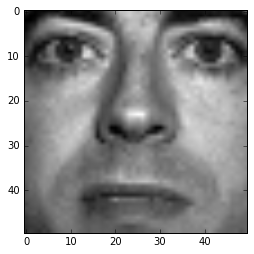

In [7]:
# X is the image index(0-100)
X = 55
test_data, test_labels = import_data('./faces/test.txt')
print (test_data.shape, test_labels.shape)
plt.imshow(test_data[X, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [8]:
print (test_data[99])

[  51.   36.   32. ...,  161.  138.  132.]


In [9]:
len(train_data)

540

In [10]:
train_data[0][0]

5.0

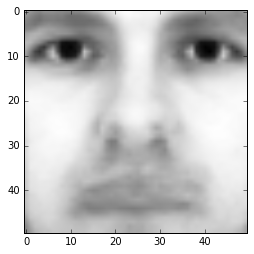

In [11]:
# Average Face. 
average_data = [None] * 2500
# go through each columns
for i in range(2500):
    sum_over_column = 0.0
# add from row 0 to row 539 and sum up
    for j in range(540):
        sum_over_column += train_data[j][i]
    average_data[i] = sum_over_column/540
# convert list to the array
average_data = np.array(average_data)
# reshape and draw the average face
plt.imshow(average_data.reshape(50,50), cmap = cm.Greys_r)
plt.show()

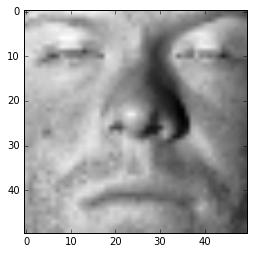

In [12]:
# show an image after mean substraction 
# X is the image index(0-540)
X = 117
train_subtraction_data = np.zeros(shape=(540,2500))
for i in range(2500):
    for j in range(540):
        train_subtraction_data[j][i] = train_data[j][i] - average_data[i]

plt.imshow(train_subtraction_data[23, : ].reshape(50,50), cmap = cm.Greys_r)
plt.show()


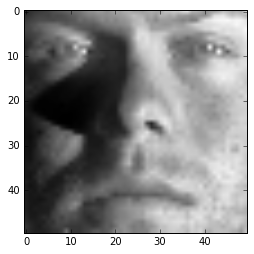

In [13]:
# show image of test after mean subtraction
# X is the image index(0-100)
X = 39
test_subtraction_data = np.zeros(shape=(540,2500))
for i in range(2500):
    for j in range(100):
        test_subtraction_data[j][i] = train_data[j][i] - average_data[i]

plt.imshow(test_subtraction_data[X, : ].reshape(50,50), cmap = cm.Greys_r)
plt.show()

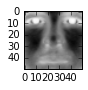

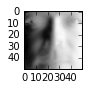

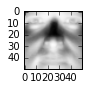

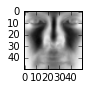

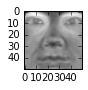

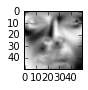

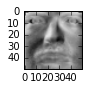

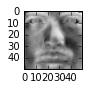

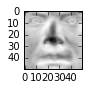

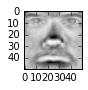

In [14]:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html
U, S, Vh = np.linalg.svd(train_data, full_matrices=False)
for index in range(10):
    image = Vh[index].reshape(50,50)
    plt.subplot(2,5,index+1)
    plt.imshow(image, cmap = cm.Greys_r)
    plt.show()

In [15]:
U.shape

(540, 540)

In [16]:
S.shape

(540,)

In [17]:
Vh.shape

(540, 2500)

In [18]:
diag_matrix = np.diag(S)
diag_matrix.shape

(540, 540)

In [19]:
diag_matrix[43][43]

2109.3822190499486

In [20]:
diag_matrix[44][44]

2082.8461533873501

In [21]:
diag_matrix[44][45]

0.0

In [22]:
len(Vh[0])

2500

In [23]:
X_r = np.zeros(shape = (len(U), len(Vh[0])))
X_r.shape

(540, 2500)

In [24]:
X_r = np.dot(np.dot(U[:,: 2], diag_matrix[: 2,: 2]), Vh [: 2,:])

In [25]:
X_r = get_low_rank_approximation(U, S, Vh, 1)
X_r

array([[   6.34876157,    6.09416   ,    5.89686777, ...,    7.88190668,
           7.40045788,    6.68481056],
       [  75.59734073,   72.56569407,   70.21645352, ...,   93.85313622,
          88.12032547,   79.59881562],
       [  80.75165854,   77.51331056,   75.00389596, ...,  100.25215618,
          94.12847548,   85.02595881],
       ..., 
       [  73.30026075,   70.36073288,   68.0828757 , ...,   91.00134067,
          85.44272553,   77.18014793],
       [  15.01828656,   14.41601487,   13.94931105, ...,   18.6450116 ,
          17.5061224 ,   15.81322585],
       [  70.33435174,   67.5137644 ,   65.32807493, ...,   87.31920239,
          81.9855025 ,   74.05724913]])

In [26]:
X_r2 = get_low_rank_approximation(U, S, Vh, 200)
X_r2

array([[   7.63864574,    6.3234327 ,    5.59505633, ...,    9.71595629,
          13.9705522 ,   27.3555467 ],
       [  65.53666925,   72.82275348,   73.506481  , ...,  107.09853084,
         106.19636558,   91.88155425],
       [  99.31280319,  115.1965522 ,  124.32043657, ...,   56.80032299,
          54.17362217,   45.69986143],
       ..., 
       [ 109.47691282,  114.92886282,  104.08244649, ...,   25.26565915,
          25.3238508 ,   21.92115559],
       [ 244.91446097,  261.6895155 ,  244.19404967, ...,   25.86997426,
          19.57139132,   24.6726354 ],
       [ 180.60113477,  183.36081739,  196.65214523, ...,   28.66442102,
          33.99379219,   34.05007888]])

In [27]:
approx_error = []
index_list = []
i = 1
while i < 201 :
    approx_error.append(la.norm(get_low_rank_approximation(U, S, Vh, i) - train_data))
    index_list.append(i)
    i +=1


In [28]:
approx_error[199]

5615.1509761263324

In [29]:
len(index_list)

200

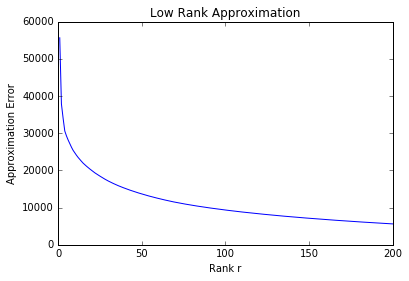

In [30]:
plt.plot(index_list, approx_error)
plt.xlabel('Rank r')
plt.ylabel('Approximation Error')
plt.title('Low Rank Approximation')
plt.show()

In [31]:
r = 10
Vh_r = Vh[:r,:]


In [32]:
Vh_r.shape

(10, 2500)

In [33]:
transpose_Vh_r = np.transpose(Vh_r)

In [34]:
F = np.dot( train_data, transpose_Vh_r)

In [35]:
F_train = get_r_dimensional_feature_face(Vh, train_data, 10)
F_test = get_r_dimensional_feature_face(Vh, test_data, 10)
print (F_train.shape)
print (F_test.shape)

(540, 10)
(100, 10)


In [36]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(F, train_labels)
# print (model)
# print (train_labels.shape)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predicted_labels = model.predict(F_test)
predicted_labels.shape

(100,)

In [40]:
get_classification_accuracy(F, train_labels, F_test, test_labels)

0.83

In [67]:
test_list = get_accuracy_list(Vh, train_data, train_labels, test_data, test_labels, 200 )

In [64]:
for i in range(len(test_list)):
    print (test_list[i])

0.17
0.1
0.12
0.12
0.36
0.36
0.45
0.64
0.7
0.83
0.8


In [70]:
xlist, ylist = get_accuracy_list(Vh, train_data, train_labels, test_data, test_labels, 200 )


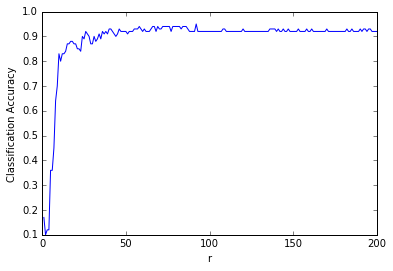

In [72]:
plt.plot(xlist, ylist)
plt.xlabel('r')
plt.ylabel('Classification Accuracy')
plt.show()
